<a href="https://colab.research.google.com/github/sprhdr/Big-Markt-Sales/blob/main/Big_Markt_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor

Data Collection & Analysis

In [98]:
# loading the dataset from csv file to a pandas DataFrame
big_markt_data = pd.read_csv('/content/Train.csv')

In [99]:
# print head of dataframe
big_markt_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
# number of data points and features
big_markt_data.shape

(8523, 12)

In [101]:
# getting some information about the dataset
big_markt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

-Item_Identifier

-Item_Fat_Content

-Item_Type

-Outlet_Identifier

-Outlet_Size

-Outlet_Location_Type

-Outlet_Type

In [102]:
# checking for missing values
big_markt_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values:

Mean => Average Value

Mode => Most Repeated Value

In [103]:
# mean value of "Item_Weight" column
big_markt_data['Item_Weight'].mean()

12.857645184135976

In [104]:
# filling the missing values in "Item_Weight" column with "mean" value
big_markt_data['Item_Weight'].fillna(big_markt_data['Item_Weight'].mean(), inplace=True)

In [105]:
# checking for missing values for "Item_Weight"
big_markt_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "Outlet_Size" with "mode"

In [106]:
mode_of_Outlet_size = big_markt_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [107]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [108]:
miss_values = big_markt_data['Outlet_Size'].isnull()

In [109]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [110]:
big_markt_data.loc[miss_values, 'Outlet_Size'] = big_markt_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [111]:
# checking for missing values
big_markt_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [112]:
# statistical measures about the data
big_markt_data.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]>

Numerical Features

In [113]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


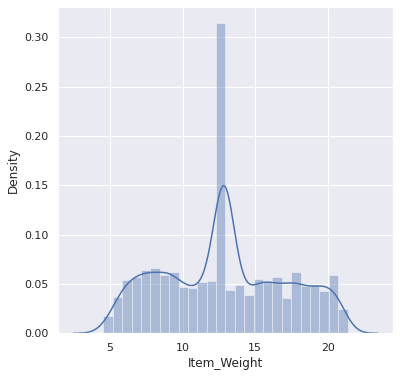

In [114]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_markt_data['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


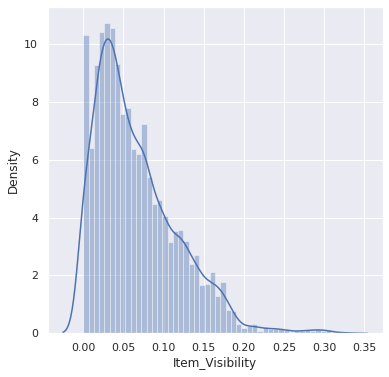

In [115]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_markt_data['Item_Visibility'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


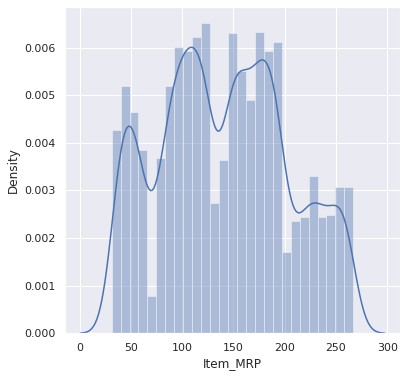

In [116]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_markt_data['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


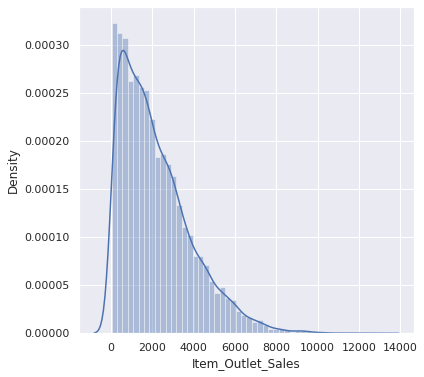

In [117]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_markt_data['Item_Outlet_Sales'])
plt.show()

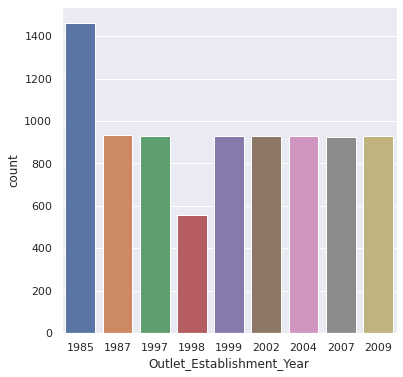

In [118]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data = big_markt_data)
plt.show()

Categorical Features

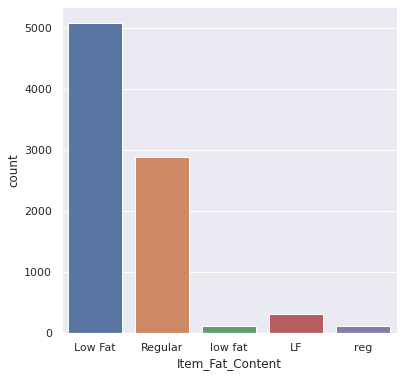

In [119]:
# Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data = big_markt_data)
plt.show()

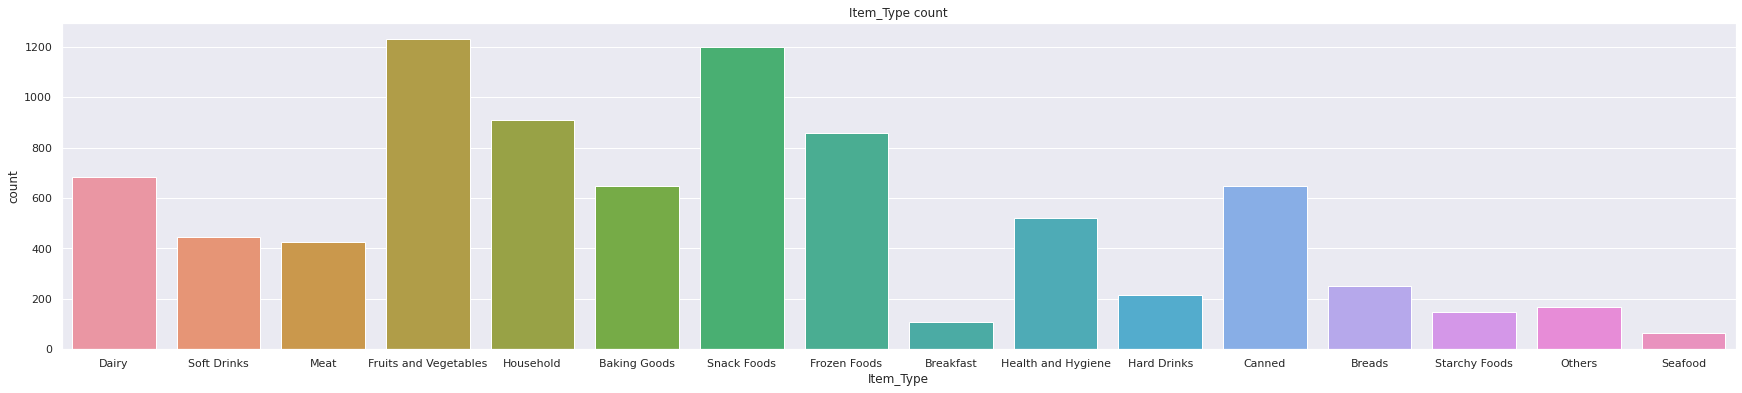

In [120]:
# Item_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data = big_markt_data)
plt.title('Item_Type count')
plt.show()

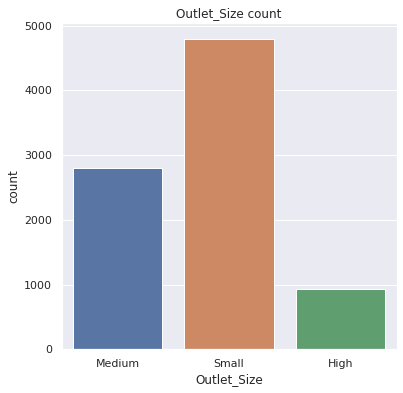

In [122]:
# Outlet_Size distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data = big_markt_data)
plt.title('Outlet_Size count')
plt.show()

Data Pre-Processing

In [123]:
big_markt_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [124]:
big_markt_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [125]:
big_markt_data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [126]:
big_markt_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [127]:
encoder = LabelEncoder()

In [128]:
big_markt_data['Item_Identifier'] = encoder.fit_transform(big_markt_data['Item_Identifier'])
big_markt_data['Item_Fat_Content'] = encoder.fit_transform(big_markt_data['Item_Fat_Content'])
big_markt_data['Item_Type'] = encoder.fit_transform(big_markt_data['Item_Type'])
big_markt_data['Outlet_Identifier'] = encoder.fit_transform(big_markt_data['Outlet_Identifier'])
big_markt_data['Outlet_Size'] = encoder.fit_transform(big_markt_data['Outlet_Size'])
big_markt_data['Outlet_Location_Type'] = encoder.fit_transform(big_markt_data['Outlet_Location_Type'])
big_markt_data['Outlet_Type'] = encoder.fit_transform(big_markt_data['Outlet_Type'])

In [129]:
big_markt_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Fretures and Target

In [130]:
X = big_markt_data.drop(columns='Item_Outlet_Sales', axis = 1)
Y = big_markt_data['Item_Outlet_Sales']

In [131]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4 

Splitting the Data into Train & Test

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [133]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [134]:
regressor = XGBRegressor()

In [135]:
regressor.fit(X_train, Y_train)

[13:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [136]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [137]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [138]:
print('R squared value : ', r2_train)

R squared value :  0.6364457030941357


In [139]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [140]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [141]:
print('R squared value : ', r2_test)

R squared value :  0.5867640914432671
